# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.093962e+01     7.358827e+00
 * time: 0.0023050308227539062
     1     2.824505e+01     4.502317e+00
 * time: 0.009315013885498047
     2     2.041404e+01     4.503013e+00
 * time: 0.013737916946411133
     3     1.426646e+01     3.320021e+00
 * time: 0.01796889305114746
     4     1.136976e+01     1.226391e+00
 * time: 0.02234792709350586
     5     1.039303e+01     1.868328e+00
 * time: 0.026379108428955078
     6     9.948041e+00     1.237510e+00
 * time: 0.0303800106048584
     7     9.496761e+00     1.116497e+00
 * time: 0.03442192077636719
     8     8.975254e+00     9.024900e-01
 * time: 0.038880109786987305
     9     8.627097e+00     6.373107e-01
 * time: 0.04339408874511719
    10     8.395141e+00     5.631311e-01
 * time: 0.04783201217651367
    11     8.259354e+00     6.791401e-01
 * time: 0.052011966705322266
    12     8.209107e+00     7.285915e-01
 * time: 0.05528402328491211
    13     8.137086e+00     5.420251e-01
 *

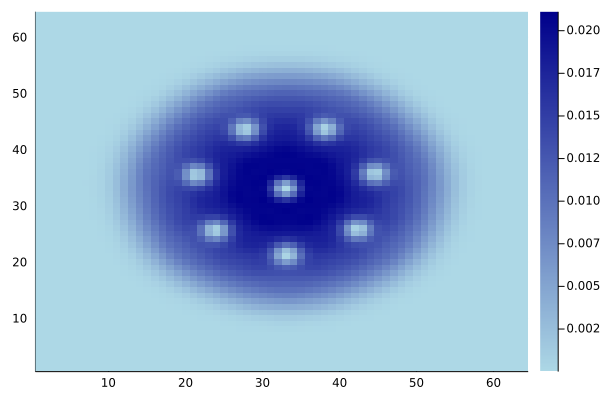

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)